In [11]:
# importing Libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("ads.csv.csv",usecols=['TV','Radio','Newspaper','Sales'])

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
# checking For Missing Values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
#descriptive statistics
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [18]:
# Calculate correlation between each pair of variable
corr_matrix=df.corr(method ='pearson')

[]

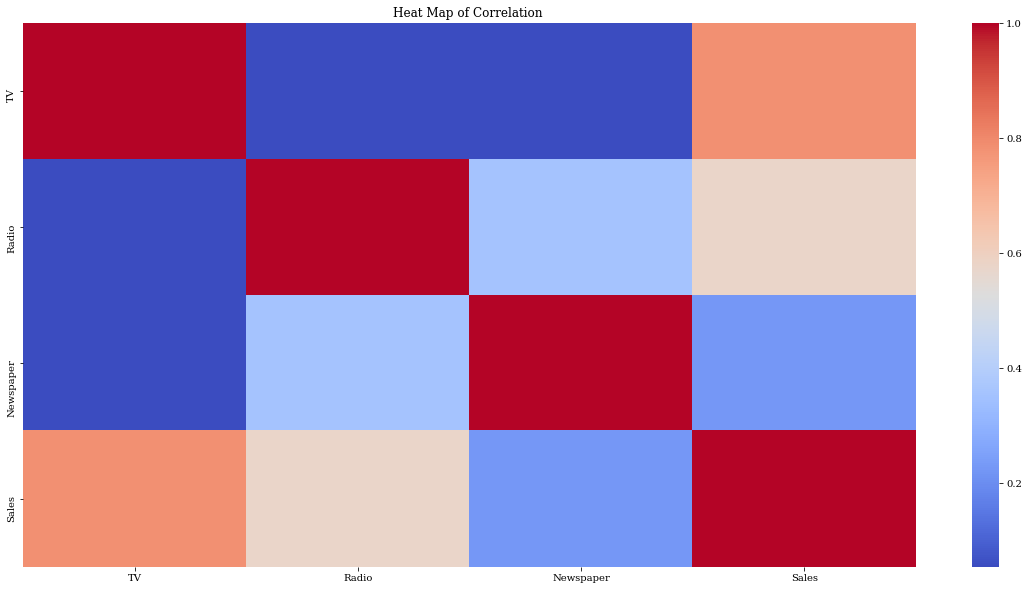

In [15]:
# plot it
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "serif"
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Heat Map of Correlation ")
plt.plot()

### Relationship Between Ads and Sales

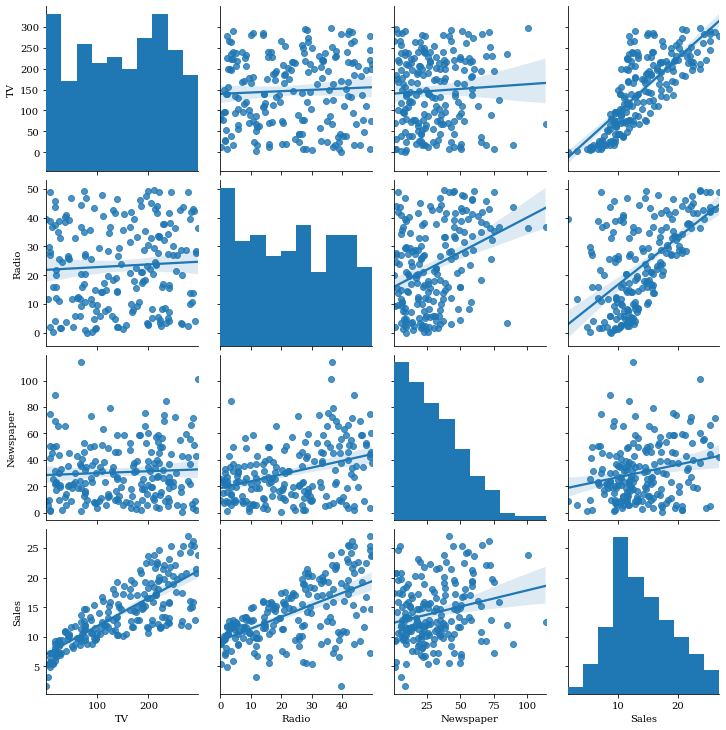

In [16]:
# with regression
sns.pairplot(df, kind="reg")
plt.show()

### As you can see from above Pariplot we can see a positive correlation between Sales and Ads with respective medium

In [19]:
print(corr_matrix)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


In [20]:
print("correlation between Sales and TV ads is positive with 0.7822.")

correlation between Sales and TV ads is positive with 0.78.


In [21]:
print("correlation between Sales and Radio ads is positive with 0.576.")

correlation between Sales and Radio ads is positive with 0.576.


In [22]:
print("correlation between Sales and Newspaper ads is positive with 0.228.")

correlation between Sales and Newspaper ads is positive with 0.228.


/home/jerry/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


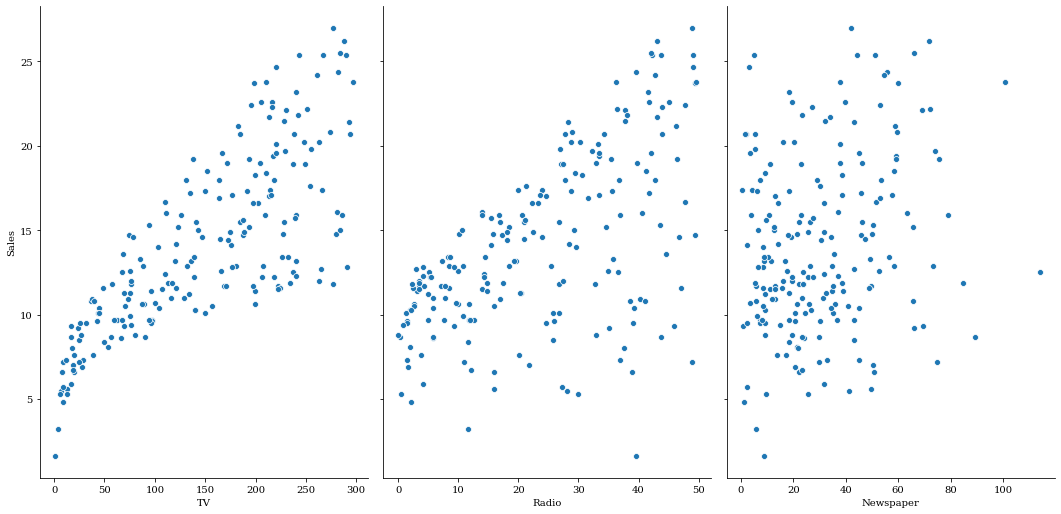

In [37]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7)

### With Positive correlation we can say that TV ads are more effective than Radio and Newspaper

In [60]:
# Building Model 
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [52]:
# TV and Sales Prediction 

In [53]:
# create X and y
feature_cols = ['TV']
X = df[feature_cols]
y = df.Sales

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [56]:
# instantiate and fit
lm = LinearRegression()
model = lm.fit(X_train, y_train)

# print the coefficients
print(lm.intercept_)
print(lm.coef_)

7.119638430592954
[0.04652973]


In [58]:
y_pred = model.predict(X_test)

In [59]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

Mean squared error: 10.20


In [61]:
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficient of determination: 0.68


In [62]:
# Extratree Regressor
from sklearn.ensemble import ExtraTreesRegressor

In [64]:
reg = ExtraTreesRegressor(n_estimators=100, random_state=0)
reg_model = reg.fit(X_train, y_train)

In [65]:
y_pred = reg_model.predict(X_test)

In [66]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 9.48
Coefficient of determination: 0.70


In [69]:
# Testing the Model with new Value
tv_sales = np.array([230.9]).reshape(-1,1)
new_pred = reg_model.predict(tv_sales)

In [70]:
new_pred

array([19.142])